In [1]:
import numpy as np
import numpy.linalg as npl
import scipy.interpolate as scpi
import matplotlib.pyplot as plt

import import_ipynb
from Polynome2p1_avecArgumentsF import *
import Fonctions_Test as FT

importing Jupyter notebook from Polynome2p1_avecArgumentsF.ipynb
importing Jupyter notebook from Polynome2p1.ipynb
importing Jupyter notebook from Fonctions_Test.ipynb


In [2]:
# Schema 
def DF_amont(U0,T,dt,dx,c):
    J = int(1/dx) - 1
    t = 0
    U = np.copy(U0)
    while t < T:
        Taum = np.concatenate(([U[-1]],U[:-1]))
        U = U - c*dt/dx * (U - Taum)
        t += dt
    return U


In [65]:
# Traitement de la donnée initiale
def gauss(x,h,origin,sigma):
    x = (x+origin)*h
    return np.exp(-((x-0.5)**2)/(2*sigma))/(np.sqrt(2*np.pi*sigma**2))

def paquet(x,h,origin,sigma,k):
    return gauss(x,h,origin,sigma)*np.sin(2*k*np.pi*x)

def creneau(x,h,origin,start,end):
    x = (x+origin)*h
    return 1 *(x>=start*h) + 1*(x<=end*h)

def u0(x,h,origin):
    x = (x+origin)*h
    return np.cos(np.pi*x)**2+1

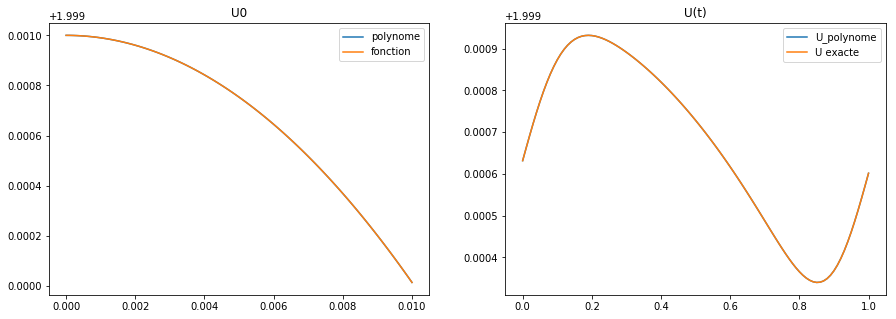

3.9157992600787666e-15


In [19]:
#Parametres du pb
n_points = 100 + 1
x = np.linspace(0,1,n_points)
dx = 1/(n_points-1) 
CFL = 1/2
c = 1
dt = dx*CFL/c
T = 2

#Parametres interpolation
p = 10
f = u0
h = dx
argf = [0] 
epsilon = 1e-5

px,fx,nbiter =  approxh(x,p,f,h,argf,epsilon,init=None,s=1)
U0 = f(x,h,*argf)

U = DF_amont(px,T,dt,dx,c)
Uex = DF_amont(U0,T,dt,dx,c)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(x*h,px,label="polynome")
plt.plot(x*h,U0,label="fonction")
plt.legend()
plt.title("U0")

plt.subplot(1,2,2)
plt.plot(x,U,label="U_polynome")
plt.plot(x,Uex,label="U exacte")
plt.legend()
plt.title("U(t)")
plt.show()

print(npl.norm(U-Uex))


In [20]:
import os
os.mkdir('./tmp/')

FileExistsError: [WinError 183] Impossible de créer un fichier déjà existant: './tmp/'

In [70]:
import imageio
import os
from IPython.display import HTML
from IPython.display import Image

# Animation
def animation2(init_u,f,argf,top,bottom):
    n_points = 100 + 1
    x = np.linspace(0,1,n_points)
    dx = 1/(n_points-1) 
    CFL = 1/2
    c = 1
    dt = dx*CFL/c
    T = 5
        
    h = dx
    if init_u == 1 : 
        U = f(x,h,*argf)
    else : 
        p = 2
        epsilon = 1e-5
        U,fx,nb_iter = approxh(x,p,f,h,argf,epsilon,init=None,s=1)

    for i in range(n_points):
        U = DF_amont(U,dt,dt,dx,c)
        plt.plot(x,U)
        plt.ylim(top=top)
        plt.ylim(bottom=bottom)
        plt.savefig("tmp/amont" + str(i) + ".png")
        plt.clf()

    images = []

    for i in range(n_points):
        images.append(imageio.imread("tmp/amont" + str(i) + ".png"))
    imageio.mimsave('animation_2.gif', images)

    with open('animation_2.gif','rb') as file:
        display(Image(file.read()))

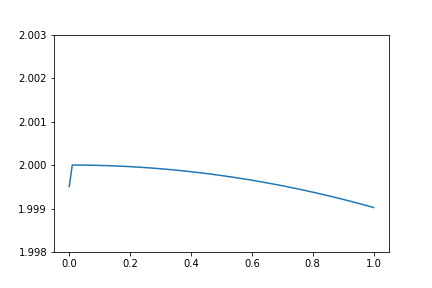

In [72]:
top = 2.003
bottom = 1.998

argf = [0]
f = u0
animation2(1,f,argf,top,bottom)

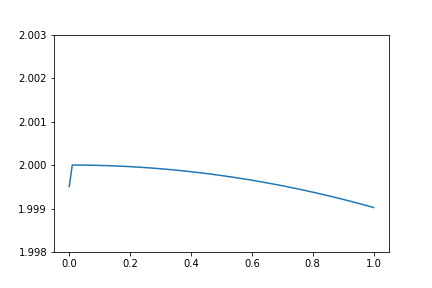

In [73]:
top = 2.003
bottom = 1.998

argf = [0]
f = u0
animation2(0,f,argf,top,bottom)

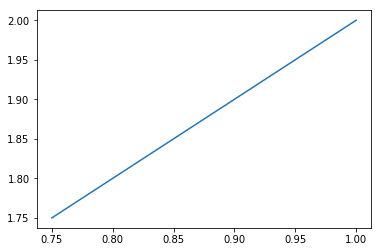

In [5]:
def affine(x,h,a):
    x = (x+a)*h
    return x+1

x = np.linspace(0,1,10)
h = 1/4
a = 3
plt.plot(x*h+a*h,affine(x,h,a))